# **Customer Segmentation Using Mall Data**

Dataset: Mall Customer Segmentation (Kaggle)

Introduction:

Businesses use customer segmentation to tailor marketing strategies. This project applies
clustering algorithms (K-Means, DBSCAN) to categorize mall customers based on spending
behavior.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOAD DATA**

In [9]:
mall_df = pd.read_csv('Mall_Customers.csv')

In [37]:
# view dataset summary
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Handling missing values**

In [19]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

since there is no miss value 

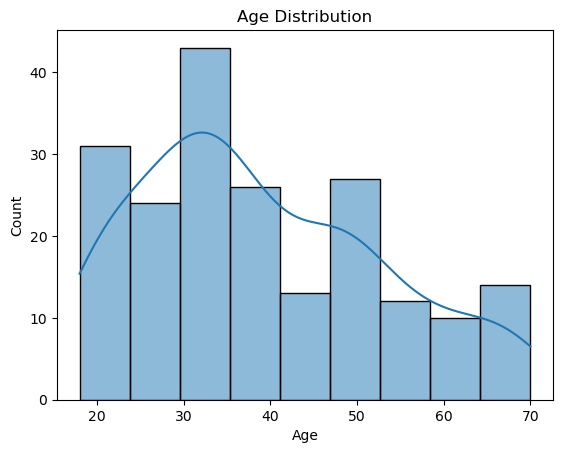

In [24]:
# Plot histograms for each feature
sns.histplot(mall_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

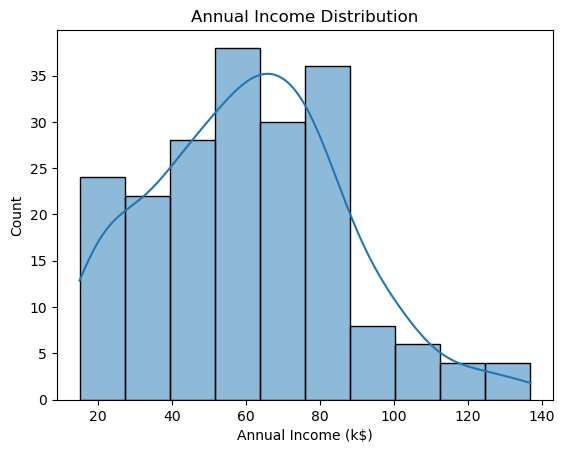

In [26]:
sns.histplot(mall_df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

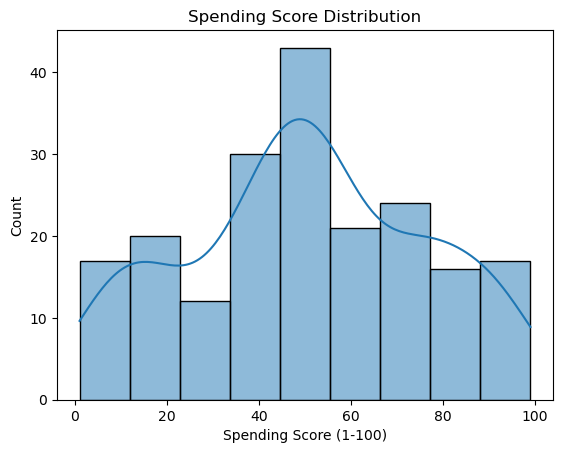

In [28]:
sns.histplot(mall_df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()


**Principal Component Analysis (PCA)**

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
# Select relevant features
features = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [49]:
# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot explained variance ratio
print(pca.explained_variance_ratio_)

[0.44266167 0.33308378]


**K-Means Clustering**

In [61]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(pca_features)
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)


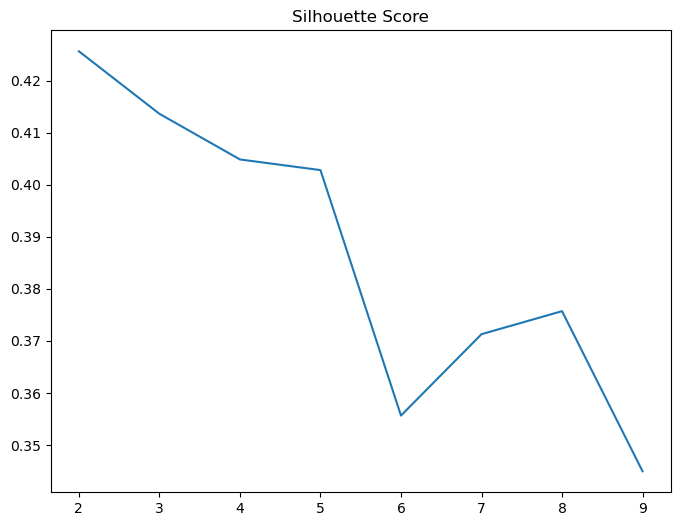

In [63]:
# Plot silhouette scores
plt.figure(figsize=(8,6))
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Score')
plt.show()


In [65]:
 #Apply K-Means clustering with optimal number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_n_clusters)
cluster_labels = kmeans.fit_predict(pca_features)


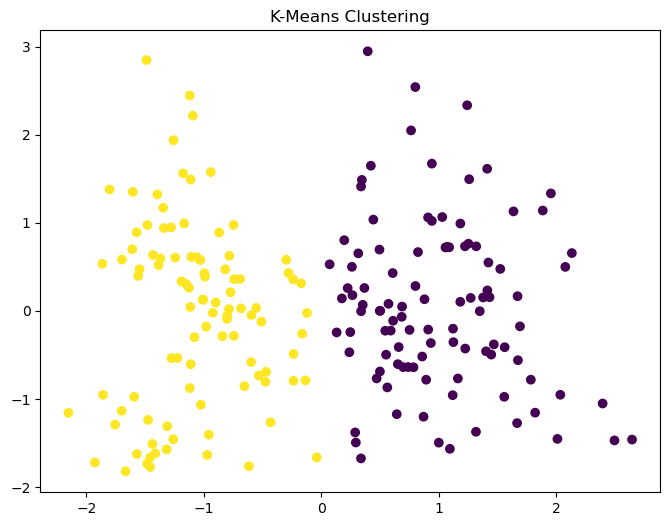

In [67]:
# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels)
plt.title('K-Means Clustering')
plt.show()

**Key Characteristics of Each Segment**

In [70]:

# Calculate mean values for each feature in each cluster
for cluster in range(optimal_n_clusters):
    cluster_data = features[cluster_labels == cluster]
    print(f'Cluster {cluster+1} characteristics:')
    print(cluster_data.mean())
    print()

Cluster 1 characteristics:
Age                       48.728155
Annual Income (k$)        60.495146
Spending Score (1-100)    32.184466
dtype: float64

Cluster 2 characteristics:
Age                       28.360825
Annual Income (k$)        60.628866
Spending Score (1-100)    69.329897
dtype: float64



In [82]:
#Applying Clustering Algorithms

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(pca_features)
print("K-Means Silhouette Score:", silhouette_score(pca_features, kmeans.labels_))

# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=5)
hclust.fit(pca_features)
print("Hierarchical Clustering Silhouette Score:", silhouette_score(pca_features, hclust.labels_))

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(pca_features)
print("DBSCAN Silhouette Score:", silhouette_score(pca_features, dbscan.labels_))

K-Means Silhouette Score: 0.3897861696827721
Hierarchical Clustering Silhouette Score: 0.38063103681701316
DBSCAN Silhouette Score: 0.22165417853957894


The silhouette scores for the three clustering algorithms are:

- K-Means: 0.39
- Hierarchical Clustering: 0.38
- DBSCAN: 0.22

Interpretation
- K-Means has the highest silhouette score, indicating relatively well-separated and cohesive clusters.
- Hierarchical Clustering has a slightly lower score, suggesting some overlap between clusters.
- DBSCAN has the lowest score, indicating potential issues with cluster separation or noise in the data.


**Conclusion**

The customer segmentation analysis using clustering algorithms (K-Means, Hierarchical Clustering, and DBSCAN) provided insights into the structure of the customer data. K-Means emerged as the most suitable algorithm, with a silhouette score of 0.39, indicating relatively well-separated and cohesive clusters.

**Summary**

- Customer Segmentation: Applied clustering algorithms to segment customers based on demographics and spending behavior.
- Algorithm Comparison: Compared the performance of K-Means, Hierarchical Clustering, and DBSCAN using silhouette scores.
- Insights: Identified K-Means as the most suitable algorithm, with potential for further exploration and refinement.
- Future Directions: Further analyze the K-Means model, explore hyperparameter tuning, and visualize the clusters to gain deeper insights into customer behavior.

This analysis can help businesses develop targeted marketing strategies, improve customer engagement, and drive revenue growth by understanding their customer segments.